## Предметная область: Игра Dota 2

[Dota 2](https://ru.wikipedia.org/wiki/Dota_2) — многопользовательская компьютерная игра жанра [MOBA](https://ru.wikipedia.org/wiki/MOBA). Игроки играют между собой матчи. В каждом матче участвует две команды, 5 человек в каждой. Одна команда играет за светлую сторону (The Radiant), другая — за тёмную (The Dire). Цель каждой команды — уничтожить главное здание базы противника (трон).

Существуют [разные режимы игры](http://dota2.gamepedia.com/Game_modes/ru)

### Как проходит матч

#### 1. Игроки выбирают героев

Всего в игре чуть более 100 различных героев (персонажей). В начале игры, команды в определенном порядке выбирают героев себе и запрещают выбирать определенных героев противнику (баны). Каждый игрок будет управлять одним героем, в рамках одного матча не может быть несколько одинаковых героев.  Герои различаются между собой своими характеристиками и способностями. От комбинации выбранных героев во многом зависит успех команды.

![](http://imgur.com/XFr4HYE.jpg)

#### 2. Основная часть

Игроки могут получать золото и опыт за убийство чужих героев или прочих юнитов. Накопленный опыт влияет на уровень героя, который в свою очередь позволяет улучшать способности. За накопленное золото игроки покупают предметы, которые улучшают характеристики героев или дают им новые способности.

После смерти герой отправляется в "таверну" и возрождается только по прошествии некоторого времени, таким образом команда на некоторое время теряет игрока, однако игрок может досрочно выкупить героя из таверны за определенную сумму золота.

В течение игры команды развивают своих героев, обороняют свою часть поля и нападают на вражескую.

![](http://imgur.com/5b0SlQb.jpg)

#### 3. Конец игры

Игра заканчивается, когда одна из команд разрушет определенное число "башен" противника и уничтожает трон.

![](http://imgur.com/Du79Kzf.jpg)

## Задача: предсказание победы по данным игры

По статистике в игре предсказать, какая из команд победит: Radiant или Dire?

## Набор данных

https://www.kaggle.com/c/mlcourse-dota2-win-prediction/data

# Библиотеки

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.linear_model import Lasso, RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

## Загрузка данных

In [2]:
train = pd.read_csv('datasets/train_features.csv', index_col='match_id_hash')
test = pd.read_csv('datasets/test_features.csv', index_col='match_id_hash')
target = pd.read_csv('datasets/train_targets.csv', index_col='match_id_hash')

In [3]:
print("Размер выборки Train:", train.shape)
print("Размер выборки Test:", test.shape)
print("Размер выборки target:", target.shape)

Размер выборки Train: (39675, 245)
Размер выборки Test: (10000, 245)
Размер выборки target: (39675, 5)


In [4]:
train.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.25,0,0,0,0


## В обучающей выборке нет нулевых элементов

In [5]:
print(train.isnull().sum().any())
for col in train.columns:
    if train[col].isnull().any():
        print(col, train[col].isnull().sum())

False


#### Функция проверяет есть ли в выборке категориальные признаки

In [6]:
def cat_type_exist(data):
    counter = 0
    counter_int = 0
    counter_float = 0
    for col in train.columns:
        if train.dtypes[col] not in good_types:
            print(col, train.dtypes[col])
            counter += 1
        else:
            if train.dtypes[col]==np.dtype('int64'):
                counter_int += 1
            else:
                counter_float += 1
    if counter > 0:
        return "Dataset has {} no int types".format(counter)
    else:
        return "Dataset hasn't categorial types\n{}-{} признаков\n{}-{} признаков".format(np.dtype('int64'), counter_int,
                                                                                          np.dtype('float64'), counter_float)

In [7]:
good_types = [np.dtype('int64'), np.dtype('float64')]
print(cat_type_exist(train))

Dataset hasn't categorial types
int64-215 признаков
float64-30 признаков


## В обучающей выборке нет категориальных признаков

# Data explore

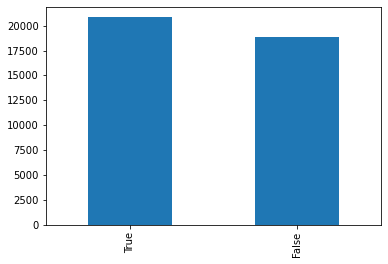

In [8]:
target['radiant_win'].value_counts().plot(kind='bar')

In [9]:
target['radiant_win'].value_counts()

True     20826
False    18849
Name: radiant_win, dtype: int64

### Есть небольшой дисбаланс, но он невысокий, поэтому ничего не будем менять

### Количество игр в разных режимах

Text(0.5, 1.0, 'Counts of games in different modes')

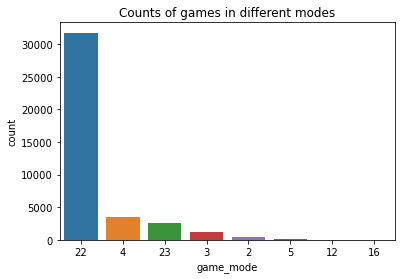

In [10]:
sns.countplot(data=train, x='game_mode', order=train['game_mode'].value_counts().index)
plt.title('Counts of games in different modes')

In [11]:
train_modes = train['game_mode'].value_counts().reset_index().rename(columns={'index': 'game_mode', 'game_mode': 'count'})
train_modes

,game_mode,count
0,22,31762
1,4,3564
2,23,2546
3,3,1200
4,2,408
5,5,188
6,12,5
7,16,2


### Распределение игрового времени в разных выборках

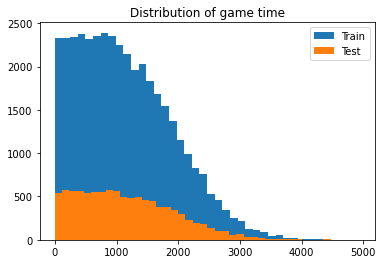

In [12]:
plt.hist(train['game_time'], bins=40, label='Train');
plt.hist(test['game_time'], bins=40, label='Test');
plt.title('Distribution of game time');
plt.legend();

## Корреляционная матрица

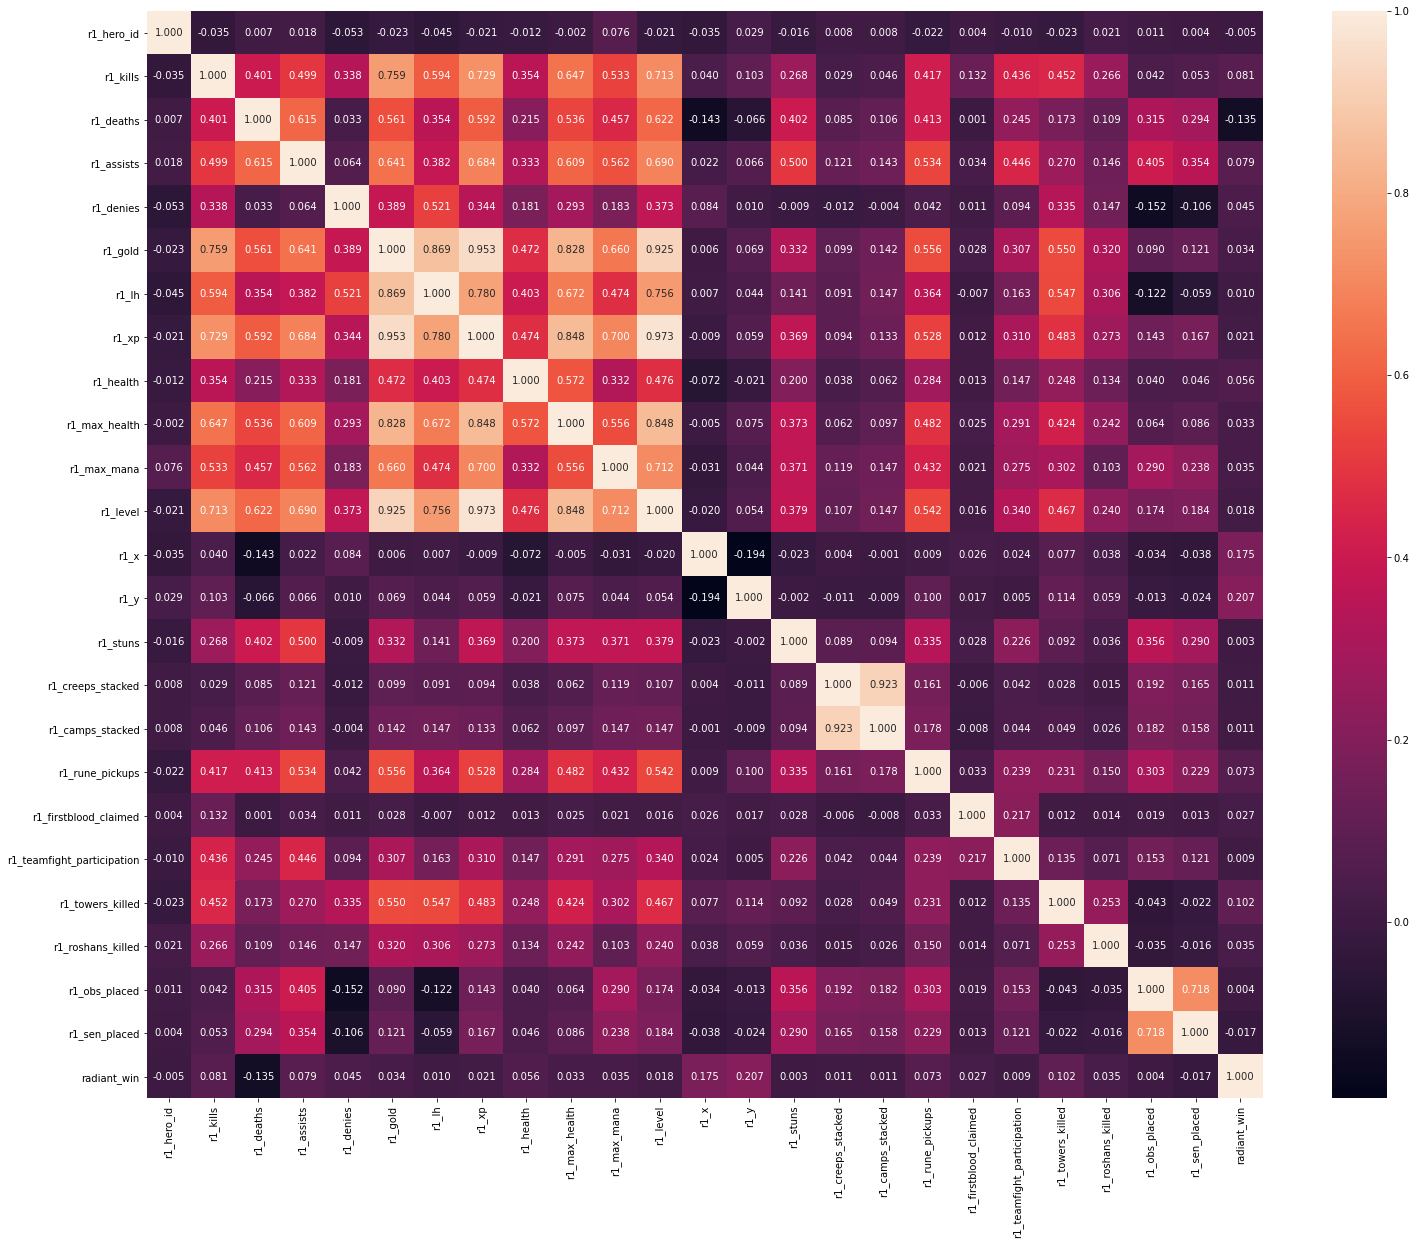

In [13]:
r1 = ['r1_hero_id',
 'r1_kills',
 'r1_deaths',
 'r1_assists',
 'r1_denies',
 'r1_gold',
 'r1_lh',
 'r1_xp',
 'r1_health',
 'r1_max_health',
 'r1_max_mana',
 'r1_level',
 'r1_x',
 'r1_y',
 'r1_stuns',
 'r1_creeps_stacked',
 'r1_camps_stacked',
 'r1_rune_pickups',
 'r1_firstblood_claimed',
 'r1_teamfight_participation',
 'r1_towers_killed',
 'r1_roshans_killed',
 'r1_obs_placed',
 'r1_sen_placed']
dataframe_new_0 = train[r1]
dataframe_new_0 = pd.concat([dataframe_new_0, target.radiant_win], axis=1)


plt.figure(figsize=(25, 20))
sns.heatmap(dataframe_new_0.corr(), annot=True, fmt='.3f')

### Заменит True, False в целевой функции на 1, 0

In [14]:
target = target.radiant_win
target = target.map(lambda x: 1 if x==True else 0)

In [15]:
target

match_id_hash
a400b8f29dece5f4d266f49f1ae2e98a    0
b9c57c450ce74a2af79c9ce96fac144d    1
6db558535151ea18ca70a6892197db41    1
46a0ddce8f7ed2a8d9bd5edcbb925682    1
b1b35ff97723d9b7ade1c9c3cf48f770    0
                                   ..
defd0caeed6ea83d7d5fbdec013fe7d1    0
bc7a87ed5f9c2bca55f9f7a93da0b0c5    1
e2ca68ac1a6847f4a37f6c9c8ee8695b    0
47ad6454ede66c1c78fdaa9391dfc556    1
9928dfde50efcbdb2055da23dcdbc101    1
Name: radiant_win, Length: 39675, dtype: int64

## Измеряем accuracy, precision, recall, f1 и AUC-ROC

In [16]:
def ft_scores(clf, X_train, y_train, X_test, y_test, predict_proba=False, scaled=False):
    
    info = []
    if scaled == True:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('\tAccuracy:', accuracy)
    print('\tPrecision:', precision)
    print('\tRecall:', recall)
    print('\tF1:', f1)
    if predict_proba == False:
        auc_roc = roc_auc_score(y_test, y_pred)
        print('\tAUC-ROC:', auc_roc)
    
    if predict_proba == True:
        probability_predictions = clf.predict_proba(X_test)
        
        auc_roc = roc_auc_score(y_test, probability_predictions[:, 1])
        print('\tAUC-ROC:', auc_roc)
    
        fpr, tpr, _ = roc_curve(y_test, probability_predictions[:, 1])
        
        
        plt.plot(fpr, tpr, label=clf)
        plt.plot([0, 1], [0, 1], '--', color='grey')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right", bbox_to_anchor=(2, 0.95))
    
    info.append(accuracy)
    info.append(precision)
    info.append(recall)
    info.append(f1)
    info.append(auc_roc)
    return info

### Алгоритмы

In [17]:
def print_models(X_train, X_test, y_train, y_test):
    
    sqrt_len_features = int(np.sqrt(len(X_train.columns)))

    knn = KNeighborsClassifier(n_jobs=-1)
    ridge = RidgeClassifier(random_state=42)
    sgd_clf = SGDClassifier(random_state=42)
    log_clf = LogisticRegression(max_iter=1e3,random_state=42)
    svc = LinearSVC(random_state=42)
    dec_tree = DecisionTreeClassifier(random_state=42)

    bag_clf = BaggingClassifier(DecisionTreeClassifier(max_features=sqrt_len_features), n_estimators=100, 
                                n_jobs=-1,random_state=42)

    rnd_forest = RandomForestClassifier(n_estimators=100, max_features=sqrt_len_features, random_state=42)

    boost_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

    xgb_clf = xgb.XGBClassifier(random_state=42, n_estimators=100)
    
    
    models = ['KNN', 'Ridge', 'SGDClassifier', 'LogisticRegression', 'LinearSVC', 
              'DecisionTreeClassifier', 'BaggingClassifier', 
             'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier']
    columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC-ROC']

    info_big = []

    list_clfs = [knn, ridge, sgd_clf, log_clf, svc, dec_tree, bag_clf, rnd_forest, boost_clf, xgb_clf]
    for clf in list_clfs:
        print("============================================================")
        start_time = datetime.now()

        scaled = False

        if clf == svc:
            scaled=True

        predict_proba = False
        if clf in [knn, log_clf, dec_tree, bag_clf, rnd_forest, boost_clf]:
            predict_proba = True

        if clf != xgb_clf:
            print(clf, ":")
        else:
            print("XGBClassifier(n_estimators=100):")

        info = ft_scores(clf, X_train, X_test, y_train, y_test, predict_proba=predict_proba, scaled=scaled)
        info_big.append(info)
        print("Time", datetime.now() - start_time)
        print("============================================================\n")

    return pd.DataFrame(info_big, columns=columns, index=models)

## Отбор признаков

In [18]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train, target, test_size=0.3, stratify=target)

In [19]:
lasso = Lasso(alpha=1)
lasso.fit(X_train_2, y_train_2)

Lasso(alpha=1)

In [20]:
np.sum(np.abs(lasso.coef_) > 1e-6)

45

In [21]:
print('Отбор признаков:')
for i, col in enumerate(X_train_2.columns):
    if np.abs(lasso.coef_[i]) > 1e-6:
        print(col)

Отбор признаков:
r1_gold
r1_xp
r1_health
r1_max_health
r1_max_mana
r2_gold
r2_xp
r2_health
r2_max_health
r3_gold
r3_xp
r3_health
r3_max_mana
r4_gold
r4_xp
r4_health
r4_max_mana
r5_gold
r5_xp
r5_health
r5_max_mana
d1_gold
d1_xp
d1_health
d1_max_mana
d2_gold
d2_xp
d2_health
d2_max_health
d2_max_mana
d3_gold
d3_xp
d3_health
d3_max_health
d3_max_mana
d4_gold
d4_xp
d4_health
d4_max_health
d4_max_mana
d5_gold
d5_xp
d5_health
d5_max_health
d5_max_mana


### gold, xp, health, max_health, max_mana - важные признаки

### Оставим только эти признаки для всей команды

In [22]:
train_copy = train.copy()

In [23]:
train_copy

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.0000,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.0000,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.0000,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.0000,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.2500,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
defd0caeed6ea83d7d5fbdec013fe7d1,1783,22,0,8,23,3,1,9,9,0,...,26.493834,6,2,3,0,0.5625,0,0,7,2
bc7a87ed5f9c2bca55f9f7a93da0b0c5,377,22,7,1,0,14,0,2,1,1,...,0.000000,0,0,1,0,0.0000,0,0,0,0
e2ca68ac1a6847f4a37f6c9c8ee8695b,643,22,7,1,23,63,1,4,0,2,...,2.532715,0,0,3,1,0.5000,0,0,1,0


In [24]:
for c in ['gold', 'xp', 'health', 'max_health', 'max_mana']:
    r_columns = [f'r{i}_{c}' for i in range(1, 6)]
    d_columns = [f'd{i}_{c}' for i in range(1, 6)]
    
    train_copy['r_total_' + c] = train_copy[r_columns].sum(1)
    train_copy['d_total_' + c] = train_copy[d_columns].sum(1)
    train_copy['total_' + c + '_ratio'] = train_copy['r_total_' + c] / train_copy['d_total_' + c]

In [25]:
columns = ['r_total_gold', 'r_total_xp', 'r_total_health', 'r_total_max_health', 'r_total_max_mana',
          'd_total_gold', 'd_total_xp', 'd_total_health', 'd_total_max_health', 'd_total_max_mana']
train_copy[columns].head()

,r_total_gold,r_total_xp,r_total_health,r_total_max_health,r_total_max_mana,d_total_gold,d_total_xp,d_total_health,d_total_max_health,d_total_max_mana
match_id_hash,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,2037,1991,2515,3520,1490.68891,3948,3084,3363,3520,1946.68935
b9c57c450ce74a2af79c9ce96fac144d,18172,17566,4498,5180,2414.68981,13144,12925,3310,4500,2222.68967
6db558535151ea18ca70a6892197db41,880,0,3128,3160,1670.68912,480,0,3146,3180,1586.68898
46a0ddce8f7ed2a8d9bd5edcbb925682,13348,14663,4477,4720,2474.68982,11301,11843,4167,4800,2102.68955
b1b35ff97723d9b7ade1c9c3cf48f770,8079,9762,3504,4660,2364.68977,9177,10806,3142,3900,1958.68937


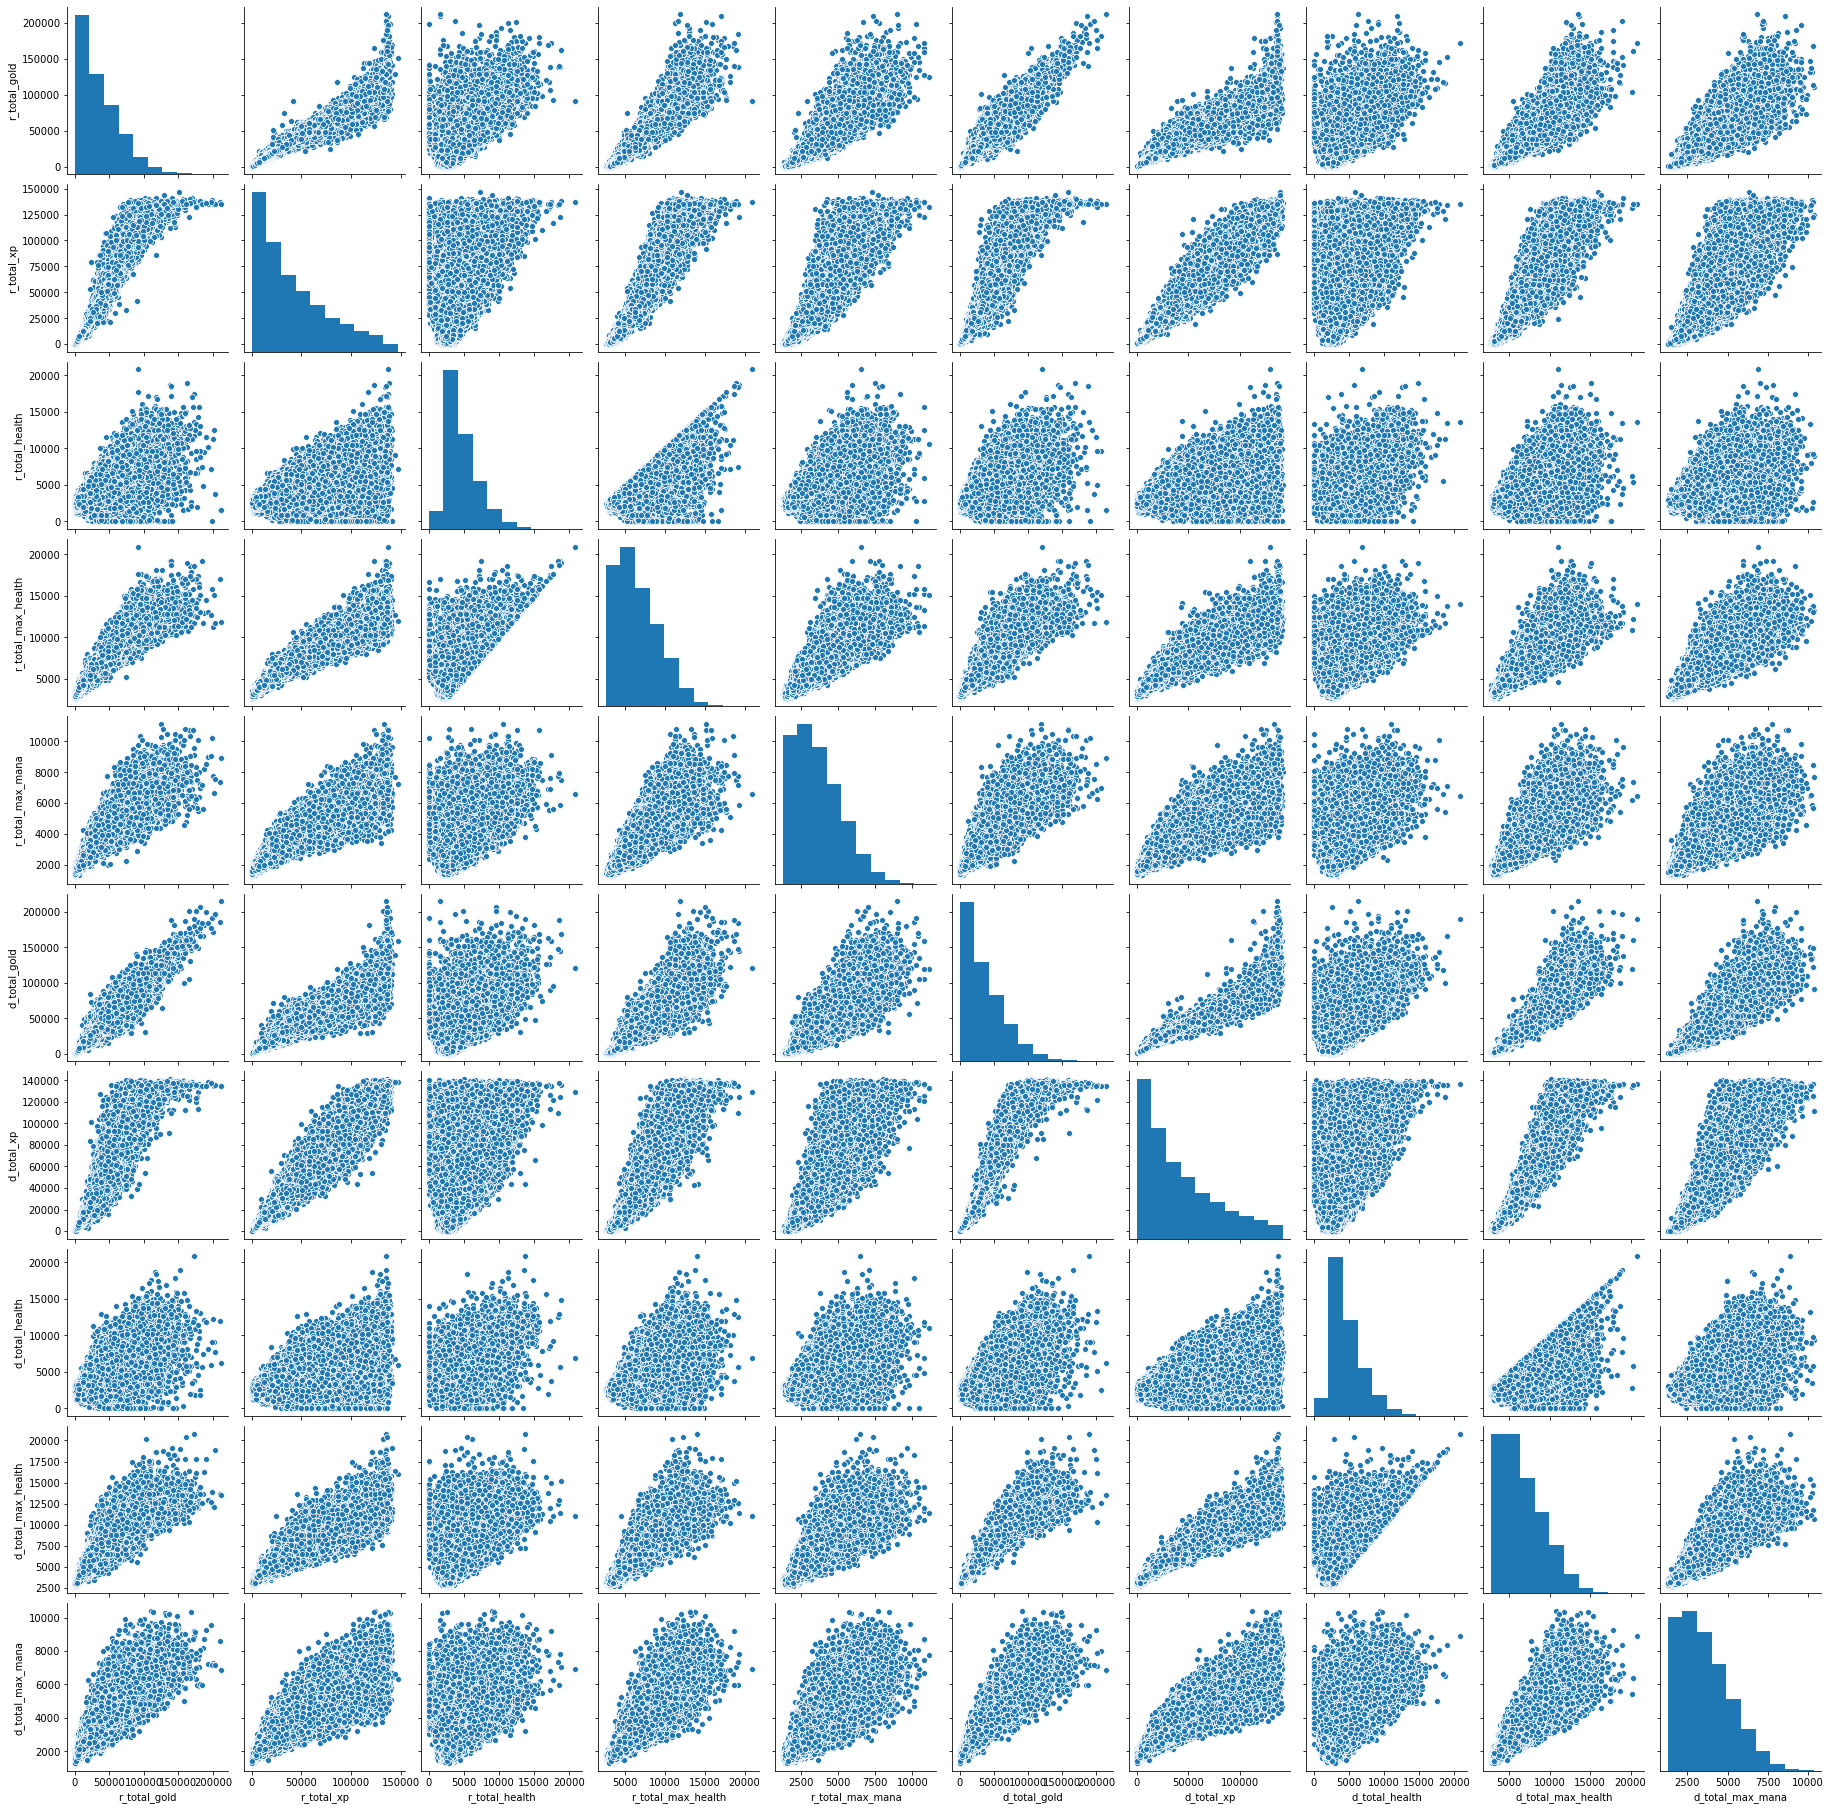

In [26]:
sns.pairplot(train_copy[columns])

In [27]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(train_copy[columns], target, test_size=0.3, stratify=target, random_state=42)

KNeighborsClassifier(n_jobs=-1) :
	Accuracy: 0.6908342434680332
	Precision: 0.7029077117572693
	Recall: 0.7119078104993598
	F1: 0.707379134860051
	AUC-ROC: 0.7572227109138231
Time 0:00:00.842527

RidgeClassifier(random_state=42) :
	Accuracy: 0.7260354532470805
	Precision: 0.697840773612399
	Recall: 0.8431498079385403
	F1: 0.7636442704935856
	AUC-ROC: 0.7198949747031339
Time 0:00:00.035875

SGDClassifier(random_state=42) :
	Accuracy: 0.7301520625052508
	Precision: 0.7529156947684106
	Recall: 0.7232714468629962
	F1: 0.7377959183673469
	AUC-ROC: 0.7305128233430808
Time 0:00:00.458512

LogisticRegression(max_iter=1000.0, random_state=42) :
	Accuracy: 0.7278837267915651
	Precision: 0.7159466054255778
	Recall: 0.7983354673495519
	F1: 0.7548997351494513
	AUC-ROC: 0.8156560373413214
Time 0:00:00.118936

LinearSVC(random_state=42) :
	Accuracy: 0.7280517516592455
	Precision: 0.7087203660058228
	Recall: 0.8181818181818182
	F1: 0.7595275239581012
	AUC-ROC: 0.7233260991881683
Time 0:00:02.781069

D

,Accuracy,Precision,Recall,F1,AUC-ROC
KNN,0.690834,0.702908,0.711908,0.707379,0.757223
Ridge,0.726035,0.697841,0.843150,0.763644,0.719895
SGDClassifier,0.730152,0.752916,0.723271,0.737796,0.730513
LogisticRegression,0.727884,0.715947,0.798335,0.754900,0.815656
LinearSVC,0.728052,0.708720,0.818182,0.759528,0.723326
DecisionTreeClassifier,0.643451,0.660423,0.660211,0.660317,0.642572
BaggingClassifier,0.722087,0.730335,0.745999,0.738084,0.805682
RandomForestClassifier,0.720827,0.728409,0.746479,0.737333,0.802975
GradientBoostingClassifier,0.720323,0.702287,0.810980,0.752730,0.806190
XGBClassifier,0.717214,0.724665,0.743918,0.734165,0.715814


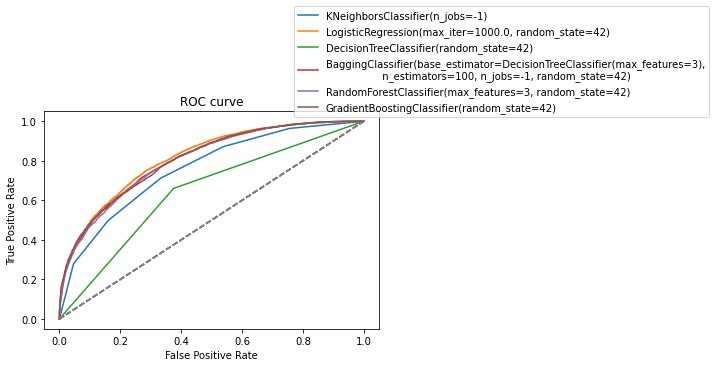

In [28]:
print_models(X_train_1, y_train_1, X_test_1, y_test_1)

## Посмотрим результат по первоначальной модели

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, stratify=target)

KNeighborsClassifier(n_jobs=-1) :
	Accuracy: 0.658069394270352
	Precision: 0.6728022849888924
	Recall: 0.678617157490397
	F1: 0.6756972111553785
	AUC-ROC: 0.713262599469496
Time 0:00:25.693223

RidgeClassifier(random_state=42) :
	Accuracy: 0.7213307569520289
	Precision: 0.7156732891832229
	Recall: 0.7783290653008963
	F1: 0.7456873418692018
	AUC-ROC: 0.7183422514833395
Time 0:00:00.322113

SGDClassifier(random_state=42) :
	Accuracy: 0.6594976056456355
	Precision: 0.6142396169459768
	Recall: 0.9444622279129321
	F1: 0.7443708609271523
	AUC-ROC: 0.6445564897301177
Time 0:00:02.358838

LogisticRegression(max_iter=1000.0, random_state=42) :
	Accuracy: 0.7225069310257918
	Precision: 0.7091322255361454
	Recall: 0.7991357234314981
	F1: 0.7514485664835578
	AUC-ROC: 0.8101135670222606
Time 0:00:10.538005

LinearSVC(random_state=42) :
	Accuracy: 0.7238511299672351
	Precision: 0.7208053691275168
	Recall: 0.7735275288092189
	F1: 0.7462363931135644
	AUC-ROC: 0.7212465230252991
Time 0:00:21.555894

De

,Accuracy,Precision,Recall,F1,AUC-ROC
KNN,0.658069,0.672802,0.678617,0.675697,0.713263
Ridge,0.721331,0.715673,0.778329,0.745687,0.718342
SGDClassifier,0.659498,0.614240,0.944462,0.744371,0.644556
LogisticRegression,0.722507,0.709132,0.799136,0.751449,0.810114
LinearSVC,0.723851,0.720805,0.773528,0.746236,0.721247
DecisionTreeClassifier,0.601613,0.622161,0.613796,0.617950,0.600974
BaggingClassifier,0.696127,0.693314,0.755122,0.722899,0.774478
RandomForestClassifier,0.698227,0.697737,0.750000,0.722925,0.774813
GradientBoostingClassifier,0.699656,0.691120,0.773528,0.730005,0.781808
XGBClassifier,0.703772,0.710421,0.735435,0.722712,0.702112


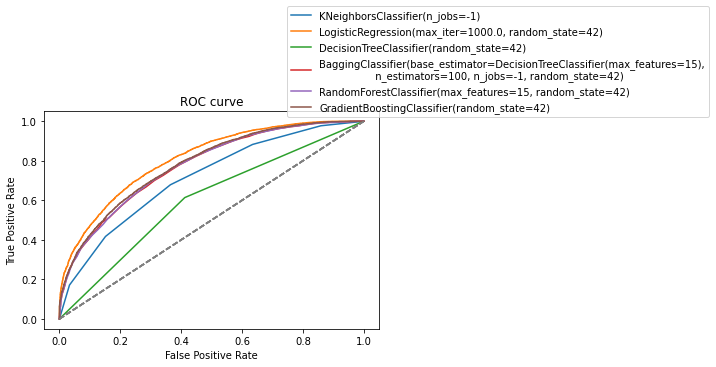

In [30]:
%%time
print_models(X_train, y_train, X_test, y_test)

## Добавим новых признаков: команды

In [31]:
for c in ['kills', 'deaths', 'assists', 'denies', 'gold', 'lh', 'xp', 
          'health', 'max_health', 'max_mana', 'level', 'x', 'y', 'stuns', 
          'creeps_stacked', 'camps_stacked', 'rune_pickups','firstblood_claimed', 
          'teamfight_participation', 'towers_killed', 'roshans_killed', 'obs_placed', 'sen_placed']:
    r_columns = [f'r{i}_{c}' for i in range(1, 6)]
    d_columns = [f'd{i}_{c}' for i in range(1, 6)]
    
    train['r_total_' + c] = train[r_columns].sum(1)
    train['d_total_' + c] = train[d_columns].sum(1)
    train['total_' + c + '_ratio'] = train['r_total_' + c] / train['d_total_' + c]

In [32]:
train.shape

(39675, 314)

#### Избавляемся от inf/nan

In [33]:
train.fillna(0, inplace=True)
train = train.replace([np.inf, -np.inf], np.nan)
train.fillna(0, inplace=True)

In [34]:
X, y = train, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

KNeighborsClassifier(n_jobs=-1) :
	Accuracy: 0.6869696715113837
	Precision: 0.6987078474629688
	Recall: 0.7096670934699104
	F1: 0.7041448308718437
	AUC-ROC: 0.749213385772395
Time 0:00:19.542220

RidgeClassifier(random_state=42) :
	Accuracy: 0.7275476770562043
	Precision: 0.7325491409998452
	Recall: 0.7575224071702945
	F1: 0.7448265009048706
	AUC-ROC: 0.7259760576965532
Time 0:00:00.367352

SGDClassifier(random_state=42) :
	Accuracy: 0.6848693606653785
	Precision: 0.8223599277046217
	Recall: 0.5097631241997439
	F1: 0.6293844481770576
	AUC-ROC: 0.6940504391997835
Time 0:00:04.012228

LogisticRegression(max_iter=1000.0, random_state=42) :
	Accuracy: 0.7315802738805344
	Precision: 0.7153943840835332
	Recall: 0.81145966709347
	F1: 0.7604049493813273
	AUC-ROC: 0.814268049418608
Time 0:00:13.547347

LinearSVC(random_state=42) :
	Accuracy: 0.7235150802318743
	Precision: 0.7259666819501758
	Recall: 0.7602432778489117
	F1: 0.7427097177703074
	AUC-ROC: 0.72158936659908
Time 0:00:29.346190

Decis

,Accuracy,Precision,Recall,F1,AUC-ROC
KNN,0.686970,0.698708,0.709667,0.704145,0.749213
Ridge,0.727548,0.732549,0.757522,0.744827,0.725976
SGDClassifier,0.684869,0.822360,0.509763,0.629384,0.694050
LogisticRegression,0.731580,0.715394,0.811460,0.760405,0.814268
LinearSVC,0.723515,0.725967,0.760243,0.742710,0.721589
DecisionTreeClassifier,0.645720,0.661988,0.664213,0.663098,0.644750
BaggingClassifier,0.728640,0.735340,0.754641,0.744866,0.815301
RandomForestClassifier,0.726287,0.731783,0.755442,0.743424,0.814571
GradientBoostingClassifier,0.736285,0.740597,0.765845,0.753010,0.822569
XGBClassifier,0.717214,0.726288,0.740237,0.733196,0.716007


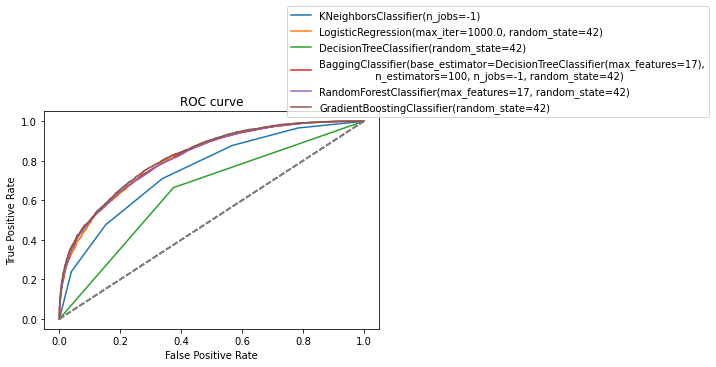

In [35]:
%%time
print_models(X_train, y_train, X_test, y_test)

## Лучшая модель - GradientBoostingClassifier

### Попробуем ее улучшить поиском по сетке

In [36]:
cv = KFold(n_splits=3, shuffle=True, random_state=42)
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
}

grad_boost = GradientBoostingClassifier(random_state=42)
grid_search = RandomizedSearchCV(grad_boost, param_distributions=parameters, scoring='accuracy', cv=cv, n_jobs=-1)

In [37]:
%%time
grid_search.fit(train, target)

Wall time: 57 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mae'],
                                        'learning_rate': [0.01, 0.025, 0.05,
                                                          0.075, 0.1, 0.15,
                                                          0.2],
                                        'loss': ['deviance'],
                                        'max_depth': [3, 5, 8],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                                        'min_samples_split': array([0.1       , 0.13636364, 0.17272727

In [38]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.075, max_depth=5,
                           max_features='log2',
                           min_samples_leaf=0.13636363636363638,
                           min_samples_split=0.24545454545454548,
                           n_estimators=10, random_state=42, subsample=0.9)

In [39]:
grid_search.best_score_

0.6956521739130435

## Попытаемся улучшить LogisticRegression

In [58]:
cv = KFold(n_splits=3, shuffle=True, random_state=42)
parameters={
    "C" : np.logspace(-3,3,7), 
    "penalty" : ["l1","l2", "elasticnet"]
}

log_reg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(log_reg, param_grid=parameters, scoring='accuracy', cv=cv, n_jobs=-1)

In [59]:
%%time
grid_search.fit(train, target)

Wall time: 26.3 s


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [60]:
grid_search.best_estimator_

LogisticRegression(C=0.1, random_state=42)

In [61]:
grid_search.best_score_

0.7240075614366729

## Cross_val_score

In [44]:
def cross_score(clf, X, y, cv, scaled=False):   
    if scaled == True:
        scaler = StandardScaler()
        pipeline = Pipeline(steps=[('scaled', scaler), ('clf', clf)])
        clf = pipeline
    cross = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    return cross.mean()

In [45]:
n_fold = 3
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [48]:
sqrt_len_features = int(np.sqrt(len(train.columns)))

knn = KNeighborsClassifier(n_jobs=-1)
ridge = RidgeClassifier(random_state=42)
sgd_clf = SGDClassifier(random_state=42)
log_clf = LogisticRegression(max_iter=1e3,random_state=42)
svc = LinearSVC(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_features=sqrt_len_features), n_estimators=100, 
                                n_jobs=-1,random_state=42)
rnd_forest = RandomForestClassifier(n_estimators=100, max_features=sqrt_len_features, random_state=42)
boost_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)    
    
list_clfs = [knn, ridge, sgd_clf, log_clf, svc, dec_tree, bag_clf, rnd_forest, boost_clf]

In [47]:
%%time
for clf in list_clfs:
    start_time = datetime.now()
    
    
    scaled = False
    
    if clf == svc:
        scaled=True
    print(clf, ":", cross_score(clf, train, target, cv=folds, scaled=scaled))
    print("Time", datetime.now() - start_time)
    print("============================================================")

KNeighborsClassifier(n_jobs=-1) : 0.6822684310018903
Time 0:00:41.357975
RidgeClassifier(random_state=42) : 0.724940138626339
Time 0:00:01.536823
SGDClassifier(random_state=42) : 0.676950220541903
Time 0:00:11.538014
LogisticRegression(max_iter=1000.0, random_state=42) : 0.7252678008821677
Time 0:00:38.714265
LinearSVC(random_state=42) : 0.7200756143667296
Time 0:01:19.717323
DecisionTreeClassifier(random_state=42) : 0.651997479521109
Time 0:00:23.154774
BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=17),
                  n_estimators=100, n_jobs=-1, random_state=42) : 0.7258727158160051
Time 0:00:29.713841
RandomForestClassifier(max_features=17, random_state=42) : 0.7260239445494644
Time 0:01:11.976201
GradientBoostingClassifier(random_state=42) : 0.7324007561436673
Time 0:05:02.576107


KeyError: 'base_score'

## Запись предсказаний победы Radiant

In [49]:
clf = LogisticRegression(penalty='l2', C=0.1)

In [50]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [51]:
probs = clf.predict_proba(X_test)[:, 1]

In [52]:
probs.shape

(11903,)

In [53]:
res = {'match_id': [], 'radiant_win': []}
for i, match_id in enumerate(X_test.index):
    res['match_id'].append(match_id)
    res['radiant_win'].append(probs[i])

In [54]:
res_df = pd.DataFrame(res)
res_df.set_index('match_id', inplace=True)

In [55]:
res_df

,radiant_win
match_id,
d0a9707217309420bb22bf3895e89ec9,0.534801
c569993cb0fa87098b1713cbf5b4fc63,0.286816
9d81152a95b363ee84a15cf74e14b330,0.178759
1f848b5de636d3a5fa8340ff71a7b548,0.624903
18143cd9c72cddfe266b2989f780881b,0.167625
...,...
0c832562729ea0e97c158bef5632288a,0.593748
9ec7d98e29eb9541e2561dfb56d24933,0.125871
c82116cec7573a11425cc8f9c2054c88,0.722158
